# Experiment : Keras Regression - Housing Prices Prediction


## Dataset

**Dataset Link**: https://www.kaggle.com/harlfoxem/housesalesprediction

### Dataset Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### Feature Columns

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Code


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the Dataset
df = pd.read_csv('kc_house_data.csv')

In [3]:
# Preliminary Data Exploration
print(df.isnull().sum())  # Check for null values
print(df.describe().transpose())  # Summary statistics

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
                 count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.6549

<Axes: xlabel='bedrooms', ylabel='price'>

<Figure size 1200x800 with 0 Axes>

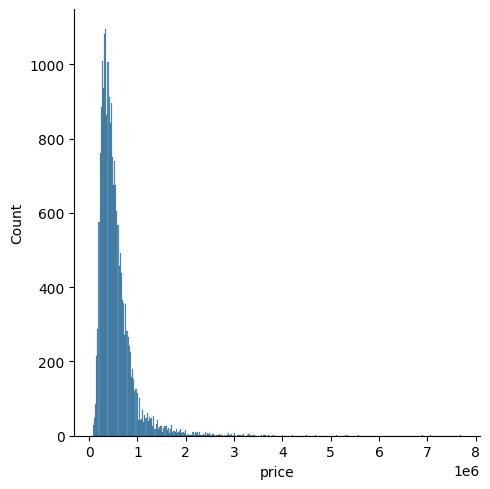

In [4]:
# Visualizing the Data
print("Visualizing the Data")

plt.figure(figsize=(12, 8))
sns.displot(df['price'])  # Distribution of house prices

plt.figure(figsize=(12, 8))
sns.countplot(df['bedrooms'])  # Count of bedrooms

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='sqft_living', data=df)  # Price vs. living area

plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', data=df)  # Price by bedroom count

In [ ]:

# Dropping unnecessary features
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

# Feature Engineering from 'yr_renovated' and 'sqft_basement'
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df.drop('sqft_basement', axis=1, inplace=True)

# Scaling and Train Test Split
X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Creating the Neural Network Model
model = Sequential([
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mse')

# Training the Model
model.fit(x=X_train, y=y_train, validation_data=(
    X_test, y_test), batch_size=128, epochs=400, verbose=0)

In [ ]:
# Evaluating Model Performance
losses = pd.DataFrame(model.history.history)
losses.plot()

predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(
    f"Explained Variance Score: {explained_variance_score(y_test, predictions)}")

# Plotting predictions vs actual prices
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')